In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
class_dist=df['Class'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))

0    284315
1       492
Name: Class, dtype: int64

Class 0: 99.83%
Class 1: 0.17%


([<matplotlib.axis.XTick at 0x21700036be0>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

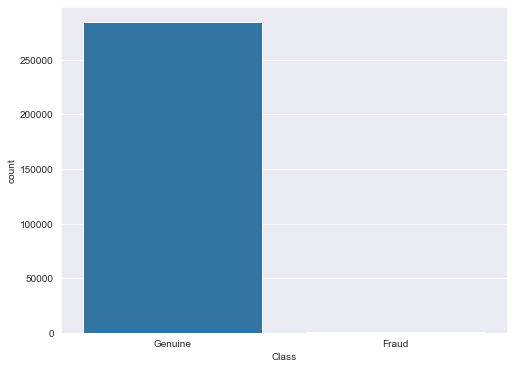

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [5]:
X = df.drop(columns=['Time','Class'])
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall Score  0.6351351351351351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.64      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

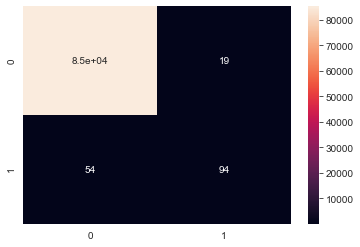

In [6]:
lr = LogisticRegression() 
lr.fit(x_train, y_train.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [7]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = BorderlineSMOTE()
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x21700420be0>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

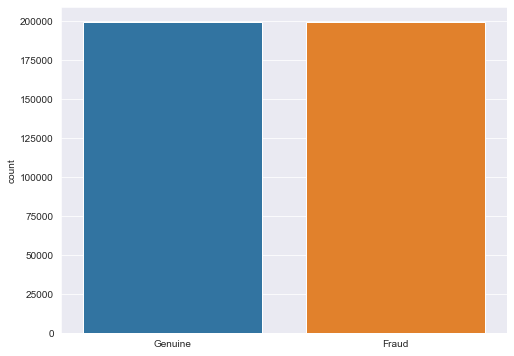

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall Score  0.8716216216216216
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.87      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



<AxesSubplot:>

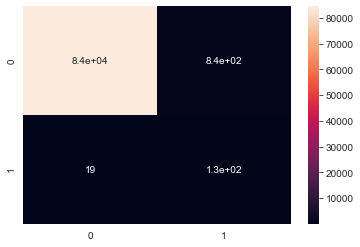

In [10]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')